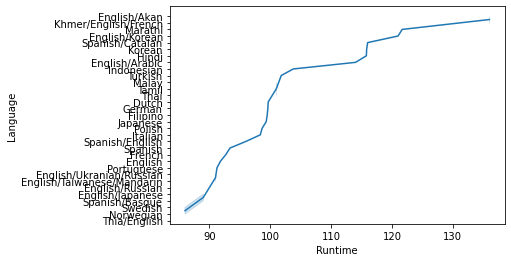

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df=pd.read_csv("C:\\Users\\hp\\Desktop\\python_files\\btcmp_projesi\\NetflixOriginals.csv",encoding_errors='ignore')

# _____________________________________________________________________________________________________________________
# 1. In which language were the long-running films created according to the dataset? Make a visualization.

df.groupby("Language").agg({"Runtime": "mean"}).sort_values(by="Runtime", ascending=False)
df.groupby("Language").agg({"Runtime": "mean"}).sort_values(by="Runtime", ascending=False)[0:1]
langbyruntime = df.groupby("Language").agg({"Runtime": "mean"}).sort_values(by="Runtime", ascending=False).reset_index()

sns.lineplot(y=langbyruntime["Language"], x=langbyruntime.loc[(langbyruntime["Runtime"] >= 86)]["Runtime"])
plt.show()

# _____________________________________________________________________________________________________________________


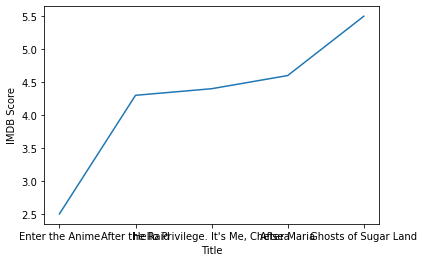

In [5]:
# 2. Finding the IMDB values of the movies shot in the 'Documentary' genre between January 2019 and June 2020
# visualize it.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df=pd.read_csv("C:\\Users\\hp\\Desktop\\python_files\\btcmp_projesi\\NetflixOriginals.csv",encoding_errors='ignore')


df["Date"] = pd.to_datetime(df.Premiere)

df.loc[(df["Genre"] == "Documentary") & (df["Date"] > "2019-01-31") & (df["Date"] < "2020-06-01")].head()

docum = df.loc[(df["Genre"] == "Documentary") & (df["Date"] > "2019-01-31") & (df["Date"] < "2020-06-01")].head()
docum["Title"].value_counts()

sns.lineplot(x=docum["Title"], y=docum["IMDB Score"])
plt.show()

In [8]:
# 3. Which genre has the highest IMDB rating among movies made in English?

df.loc[(df["Language"] == "English")]
dfeng = df.loc[(df["Language"] == "English")]
dfeng.sort_values(by="IMDB Score", ascending=False)[0:1]

,Title,Genre,Premiere,Runtime,IMDB Score,Language
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English


In [7]:
# _____________________________________________________________________________________________________________________
# 4. What is the average 'runtime' of movies shot in 'Hindi'?

df.loc[(df["Language"] == "Hindi")].agg({"Runtime": "mean"})

Runtime    115.787879
dtype: float64

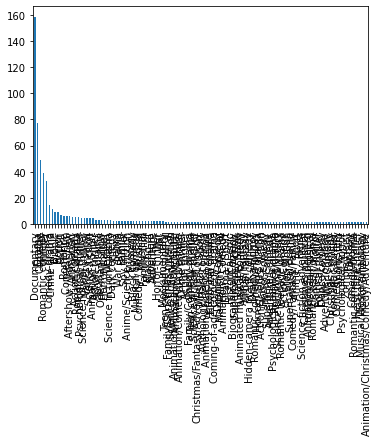

In [5]:
# 5. How many categories does the 'Genre' Column have and what are those categories? Express it visually.

df["Genre"].unique()
df["Genre"].value_counts()
df["Genre"].nunique()
df["Genre"].value_counts().plot(kind='bar')
plt.show()

In [7]:
# 6. Find the 3 most used languages in the movies in the data set.

df["Language"].value_counts(sort=True)[0:3]

# _____________________________________________________________________________________________________________________


English    401
Hindi       33
Spanish     31
Name: Language, dtype: int64

In [8]:
# 7. What are the top 10 movies with the highest IMDB rating?

df.sort_values(by="IMDB Score", ascending=False)[0:10]


,Title,Genre,Premiere,Runtime,IMDB Score,Language,Date
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English,2020-10-04
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese,2020-12-08
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English,2018-12-16
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian,2015-10-09
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English,2018-12-31
578,Ben Platt: Live from Radio City Music Hall,Concert Film,"May 20, 2020",85,8.4,English,2020-05-20
577,Dancing with the Birds,Documentary,"October 23, 2019",51,8.3,English,2019-10-23
576,Cuba and the Cameraman,Documentary,"November 24, 2017",114,8.3,English,2017-11-24
573,Klaus,Animation/Christmas/Comedy/Adventure,"November 15, 2019",97,8.2,English,2019-11-15
571,13th,Documentary,"October 7, 2016",100,8.2,English,2016-10-07


In [9]:
# 8. What is the correlation between IMDB score and 'Runtime'? Examine and visualize:

df.corr()


,Runtime,IMDB Score
Runtime,1.000000,-0.040896
IMDB Score,-0.040896,1.000000


<AxesSubplot:title={'center':'Correlation Matrix'}>

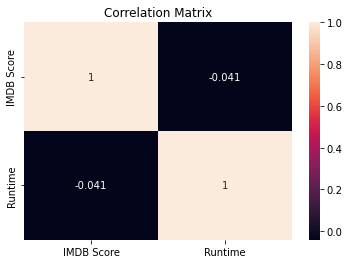

In [13]:
plt.title('Correlation Matrix')
sns.heatmap(df[['IMDB Score', 'Runtime']].corr(), annot=True)

In [15]:
print('There is a negative correlation between movie runtimes and IMDB scores.\nAs movie times increase, IMDB Score decreases.')


There is a negative correlation between movie runtimes and IMDB scores.
As movie times increase, IMDB Score decreases.


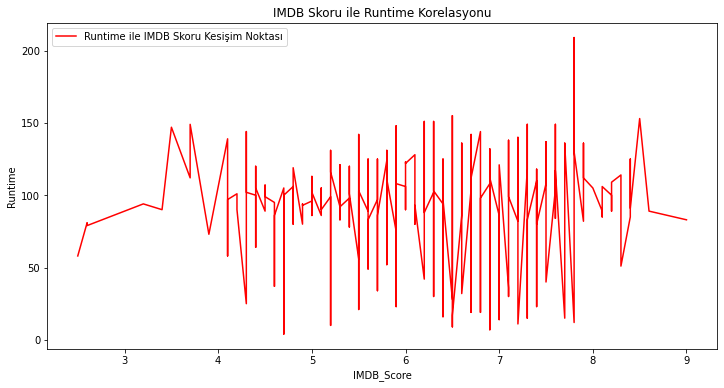

In [23]:
IMDB_Score = df['IMDB Score']
Runtime = df['Runtime']

plt.figure(figsize=(12,6))
plt.plot(IMDB_Score, Runtime, label='Runtime ile IMDB Skoru Kesişim Noktası', color='r')
plt.xlabel('IMDB_Score')
plt.ylabel('Runtime')
plt.title('IMDB Skoru ile Runtime Korelasyonu')
plt.legend()
plt.show()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


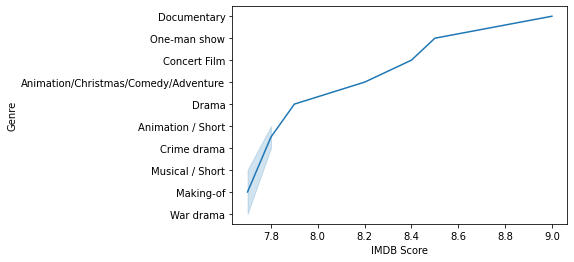

In [14]:
# 9. What are the top 10 'Genre's with the highest IMDB Ratings? Visualize it.

df.groupby("Genre").agg({"IMDB Score": "max"}).sort_values(by="IMDB Score", ascending=False)[0:10]
genrescore_on = df.groupby("Genre").agg({"IMDB Score": "max"}).sort_values(by="IMDB Score", ascending=False)[
                0:10].reset_index()

sns.lineplot(y=genrescore_on["Genre"], x=genrescore_on["IMDB Score"])
plt.show()

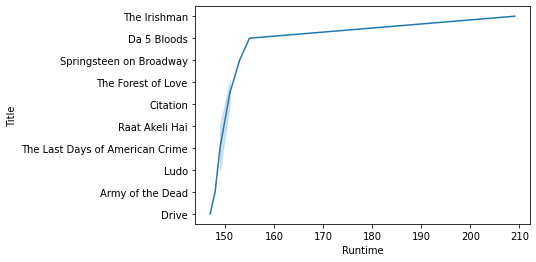

In [15]:
# 10. What are the top 10 movies with the highest 'runtime'? Visualize it.

df.groupby("Title").agg({"Runtime": "max"}).sort_values(by="Runtime", ascending=False)[0:10]

Runtime_on = df.groupby("Title").agg({"Runtime": "max"}).sort_values(by="Runtime", ascending=False)[0:10].reset_index()

sns.lineplot(y=Runtime_on["Title"], x=Runtime_on["Runtime"])
plt.show()

In [18]:
# 11. In which year was the most movies released? Visualize it.

df['year'] = df['Date'].dt.year
df['year'].value_counts(sort=True)[0:1]

2020    183
Name: year, dtype: int64

In [19]:
# 12. Which language movies have the lowest average IMDB rating? Visualize it.

df.groupby("Language").agg({"IMDB Score": "mean"}).sort_values(by="IMDB Score", ascending=True)[0:1]


,IMDB Score
Language,
Malay,4.2


In [20]:
# 13. Which year has the greatest total runtime?

df.groupby("Year").agg({"Runtime": "sum"}).sort_values(by="Runtime", ascending=False)[0:1]


,Runtime
Year,
2020,17384


In [21]:
# 14. What is the most used "Genre" of each language?
df.groupby(["Language"])["Genre"].value_counts(sort=True).groupby(level=0).head(1)


Language                    Genre                
Bengali                     Documentary                1
Dutch                       Crime drama                1
English                     Documentary              120
English/Akan                War drama                  1
English/Arabic              Documentary                1
English/Hindi               Documentary                2
English/Japanese            Crime drama                1
English/Korean              Action-adventure           1
English/Mandarin            Documentary                2
English/Russian             Documentary                1
English/Spanish             Documentary                5
English/Swedish             Documentary                1
English/Taiwanese/Mandarin  Drama                      1
English/Ukranian/Russian    Documentary                1
Filipino                    Drama                      1
French                      Documentary                6
Georgian                    Documentar

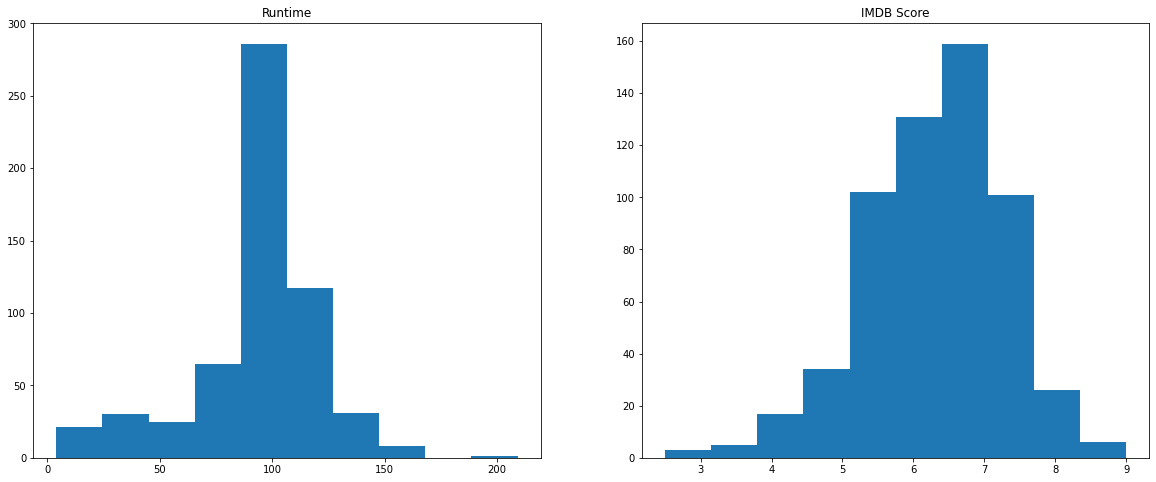

Number of outlier values of Runtime: 75 Number of outlier values of IMDB Score: 9


In [25]:
#Outlier Analysis

#df.info()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 8))
 
ax1.hist(df["Runtime"])
ax1.set_title("Runtime")
 
ax2.hist(df["IMDB Score"])
ax2.set_title("IMDB Score")

 
plt.show()

def iqr(df,var):
    q1 = np.quantile(df[var], 0.25)
    q3 = np.quantile(df[var], 0.75)
    diff = q3 - q1
    lower_t = q1 - (1.5 * diff)
    upper_t = q3 + (1.5 * diff)
    return df[(df[var] < lower_t) | (df[var] > upper_t)]

runtime_out = iqr(df, "Runtime")
IMDB_Score_out = iqr(df, "IMDB Score")
 
print("Number of outlier values of Runtime: "+str(len(runtime_out))+
      " Number of outlier values of IMDB Score: "+str(len(IMDB_Score_out)))